**Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек**.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и *какие гипотезы на ее основе можно выдвинуть*.

**Откуда брать данные?**

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, [kaggle.com](https://www.kaggle.com/)). Если идей нет, можете взять один из перечисленных ниже:

* [Данные IMDB](https://www.kaggle.com/tmdb/tmdb-movie-metadata);
* [Данные NYC](https://www.kaggle.com/c/nyc-taxi-trip-duration);
* [Данные NBA](https://www.kaggle.com/drgilermo/nba-players-stats).

In [224]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [235]:
# импортируем модные ныне данные
data = pd.read_csv('covid.csv')
data['Fatality'] = data['Fatalities']/data['ConfirmedCases']
data['Fatality'].fillna(0, inplace=True)
data=data.sort_values('ConfirmedCases')
data.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Fatality
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,0.0
17250,24611,NaN,Tunisia,2020-01-22,0.0,0.0,0.0
17226,24555,NaN,Trinidad and Tobago,2020-03-13,0.0,0.0,0.0
17225,24554,NaN,Trinidad and Tobago,2020-03-12,0.0,0.0,0.0
17224,24553,NaN,Trinidad and Tobago,2020-03-11,0.0,0.0,0.0


In [226]:
#отфильтруем две страны и статистически недостоверные величины заболевших
datai = data[((data['Country_Region'] =='Italy') & (data['ConfirmedCases'] > 10))]
datac = data[((data['Country_Region'] =='China') & (data['ConfirmedCases'] > 10))]

In [227]:
trace0 = go.Scatter(
    x=datai.ConfirmedCases,
    y=datai.Fatality,
    name='Italy'
)

trace1 = go.Scatter(
    x=datac.ConfirmedCases,
    y=datac.Fatality,
    name='China'
)

trace2 = go.Scatter(
    x=datar.ConfirmedCases,
    y=datar.Fatality,
    name='USA'
)
  
lines = [trace0, trace1, trace2]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=lines, layout=layout)

In [228]:
#можно увидеть, что китайская медицина и жесткие меры карантина оказались значительно эффективнее итальянских
#допускаю, что выводы можно сделать более правильными, если наложить сюда возраст умерших и заболевших
#прошу в комментарии к работе показать мне как можно было сделать два графика на одном листе через функцию  plot()
#у меня это не получилось

iplot(fig)

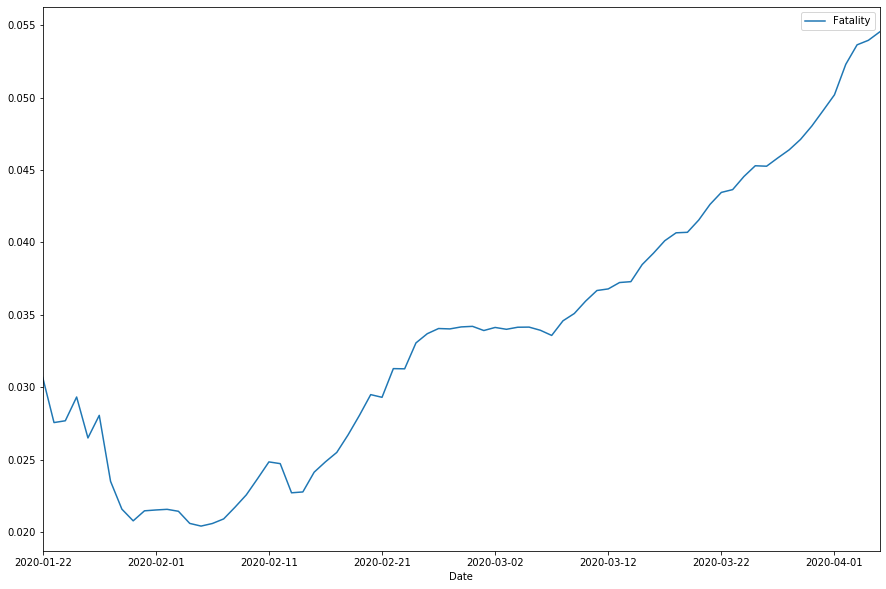

In [229]:
#Видно, что несмотря на принимаемые меры защиты от вируса, смертность в мире растёт
world = data.groupby('Date').sum()
world['Fatality'] = world['Fatalities']/world['ConfirmedCases']
world.head()
world.plot(y='Fatality')

In [230]:
#смертность по странам (топ-20).
cfatality = data[data['ConfirmedCases'] > 100]
cfatality = cfatality.groupby('Country_Region').max()
cfatality['Fatality'] = cfatality['Fatalities']/cfatality['ConfirmedCases']
cfatality = cfatality.sort_values('Fatality', ascending = False).head(20)[['Fatality', 'ConfirmedCases']]
cfatality.style.bar()
#как убрать представление больших чисел в виде "1.81031e+06"? Места в ячейке вроде бы хватает

,Fatality,ConfirmedCases
Country_Region,,
Italy,0.123205,128948
San Marino,0.120301,266
Congo (Kinshasa),0.116883,154
Algeria,0.115152,1320
United Kingdom,0.103209,47806
Netherlands,0.09893,17851
Spain,0.0960227,131646
Indonesia,0.0871095,2273
France,0.0870108,92839


In [231]:
data.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Fatality
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,0.0
17250,24611,NaN,Tunisia,2020-01-22,0.0,0.0,0.0
17226,24555,NaN,Trinidad and Tobago,2020-03-13,0.0,0.0,0.0
17225,24554,NaN,Trinidad and Tobago,2020-03-12,0.0,0.0,0.0
17224,24553,NaN,Trinidad and Tobago,2020-03-11,0.0,0.0,0.0


In [236]:
#покажем смертность и количество заболевших в самых пострадавших странах:
topfatality = data.groupby('Country_Region').max().sort_values('Fatalities', ascending = False).head(20)
topfatality['Fatality'] = topfatality['Fatalities']/topfatality['ConfirmedCases']
topfatality = topfatality[['Fatality', 'ConfirmedCases', 'Fatalities']]

In [246]:
trace0 = go.Scatter(
    x=topfatality.ConfirmedCases,
    y=topfatality.Fatality,
    mode = 'markers+text',
    text = topfatality.index,
    textposition='bottom center',
    marker = dict(
        size = topfatality.Fatalities/200,
    )
)

top = [trace0]
layout = {'title': 'Fatalities statistic by countries (top-20)', 'yaxis': {'title': 'COVID-19 confirmed cases'}, 
          'xaxis': {'title': 'Fatality'}}

fig = go.Figure(data=top, layout=layout)

iplot(fig, show_link=False)